# Classification Demo: k-NN Classification
The purpose of this demo is to demonstrate the ease and utility of performing classification. Although there are many classifiers (many of which are intimately related with similarly-named regressions) one of the most used and easiest to understand classifiers is **k-Nearest Neighbors**. Basically, each sample of training data is a labeled point in a high dimensional space, and when test data comes in you simply poll the k nearest neighbors to that unlabeled point to determine which class it belongs to.

In this example, we will generate data that belongs to three different sources. We will then train the classifier using a subset of the data, and test the classifier on a separate set.

## Demo Instructions:

Perform the following steps:
1. Create a function that generates features depending on a label being either 'A', 'B', or 'C'. Assume n is the (0,1) normal distribution. 
    * A: (x,y) = (1+n, 3+n)  
    * B: (x,y) = (3+n, 5+n)
    * C: (x,y) = (5+n,1+n)
2. Generate two samples with equal numbers in each class. 
    * A training set of 30 samples 
    * A test set of 150 samples 
3. Create a k-NN classifier with the following values of k: 
    * k = 1 
    * k = 3 
    * k = 5 
4. Create a scatter plot showing the training data with the labels as different colors and include a legend. </li>
5. Apply each of the 3 classifiers to predict the class in the test set. Find the overall accuracy, average recall, and average precision. Also, create the confusion matrix showing the mistakes. 

# Solutions:

## 1. Create a function that generates features depending on a label being either ‘A’, ‘B’, or ‘C’. Assume n is the (0,1) normal distribution
* A: (x,y) = (1 + n, 3 + n)
* B: (x,y) = (3 + n, 5 + n)
* C: (x,y) = (5 + n, 1 + n)

In [19]:
# Clear your environment.
rm (list = ls())

# Create a function.
mydff <- function(n){
  n<-n/3
  x1 <- 1 + rnorm(n)
  y1 <- 3 + rnorm(n)
  
  x2 <- 3 + rnorm(n)
  y2 <- 5 + rnorm(n)
  
  x3 <- 5 + rnorm(n)
  y3 <- 1 + rnorm(n)
  
  myclass <- rep(c("A", "B", "C"), c(n,n,n))

  df <- data.frame(class = myclass, x = c(x1,x2,x3), y = c(y1,y2,y3))
  df

  return(df)
}

## 2. Generate two samples with equal numbers in each class.
* A training set of 30 samples total.
* A test set of 150 samples.

In [20]:
train = mydff(30)
test = mydff(150)
print(train)

   class           x           y
1      A  1.52861570  2.83138744
2      A  1.90915903  1.90778537
3      A  2.08808192  2.56921173
4      A  1.29649773  4.10097614
5      A  0.97914022  4.58965100
6      A  0.08870518  1.92522982
7      A -0.25593664  3.27791343
8      A  0.02250799  3.39683586
9      A  0.22310919  3.13920810
10     A  1.24243473  1.71412215
11     B  5.05016799  5.38622479
12     B  3.19111463  2.58019732
13     B  3.13794738  4.38965393
14     B  3.95708151  2.16010021
15     B  3.09336724  5.40721526
16     B  3.55734582  5.34767449
17     B  2.20421836  4.57848559
18     B  3.07877020  4.50760465
19     B  3.13027671  5.29032309
20     B -0.84195442  5.80799086
21     C  6.22545593  3.86457842
22     C  3.65116365  0.80534560
23     C  7.57288703  1.17012327
24     C  4.35174916  0.96461070
25     C  1.89510000  2.75828833
26     C  4.80680887  1.14351117
27     C  5.76195000  1.00931949
28     C  6.08314728  0.84919694
29     C  4.68521706  0.78877158
30     C  

## 3. Create a k-NN classifier with the following values of k
* K = 1
* K = 3
* K = 9 (optional)

In [21]:
library(class)
knn.1 <- knn(train[,2:3], test[,2:3], train[,1], k=1)
knn.3 <- knn(train[,2:3], test[,2:3], train[,1], k=3)
knn.9 <- knn(train[,2:3], test[,2:3], train[,1], k=9)
knn.1

[1] B A A A A A A A A A A A A A A A B A A A A A A B A A A A A B A A A A C A A
 [38] A A A B A A A A A A C A C B B B B B B B B B A B B B B B B B B B B B B B B
 [75] B B B B B B B B B B B B B A B B B B B B B B A B B B C C C C C C C C C B C
[112] B C C C C C C C C C C C C C C C C C C C C C C C C C C B C C C C C C C C C
[149] C C
Levels: A B C

## 4. Create a scatter plot showing the training data with the labels as different colors and include a legend.

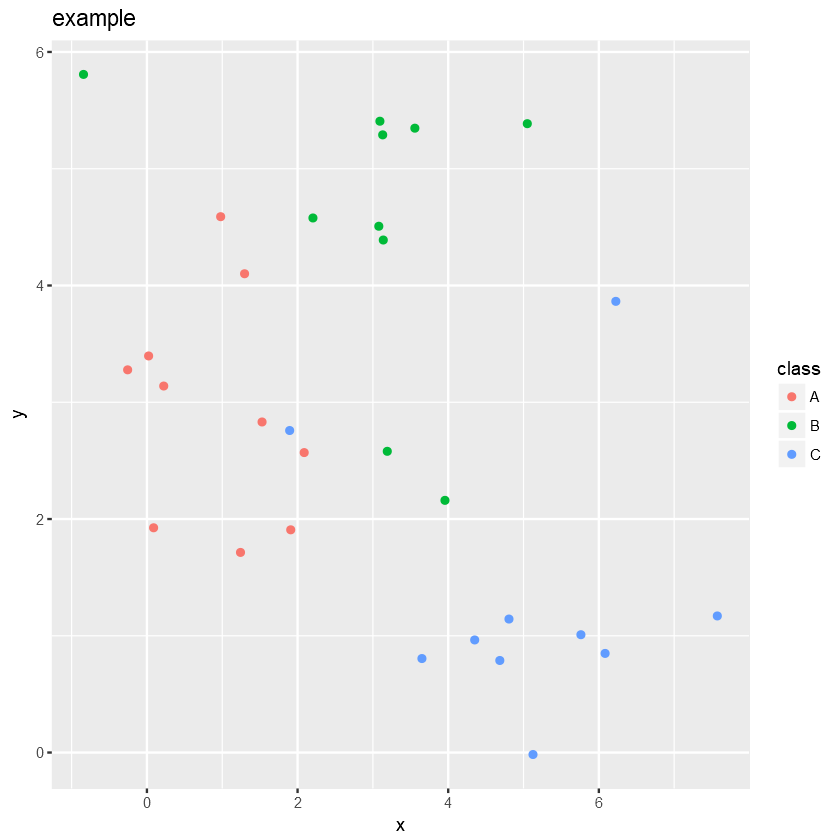

In [22]:
library(ggplot2)
ggplot(train, aes(x=x,y=y,col=class)) + geom_point() + ggtitle("example")

## 5. Apply each of the 3 classifiers to predict the class in the test set. Find the overall accuracy, average recall, and average precision. Also, create the confusion matrix showing the mistakes (The expectation is that k=3 will perform best, but this is not guaranteed)

In [23]:
# Accuracy

acc  <- data.frame(matrix(0, ncol = 1, nrow = 3))
names(acc) <- c("Accuracy")
rownames(acc) <- c("knn.1 ", "knn.3 ", "knn.9 ")
acc[1,1] <- 100 * sum(test$class == knn.1)/150
acc[2,1] <- 100 * sum(test$class == knn.3)/150
acc[3,1] <- 100 * sum(test$class == knn.9)/150
acc

,Accuracy
knn.1,90.66667
knn.3,90.66667
knn.9,93.33333


In [24]:
# Precision of each K-NN classifier
my_p_and_r_f <- function(k) {
  correct_A <- 0 
  correct_B <- 0 
  correct_C <- 0 
  for (i in 1:50) # check the first 50 to see if they are A
  {
    if (k[i] == "A")
      correct_A <- correct_A +1
  }
  for (i in 51:100) # check 51-100 to see if they are B
  {
    if (k[i] == "B")
      correct_B <- correct_B +1
  }

  for (i in 101:150) # check 101-150 to see if they are C 
  {
    if (k[i] == "C")
      correct_C <- correct_C +1
  }
  
  num_A <- 0 # set an initial value of zero
  num_B <- 0 
  num_C <- 0
  for (i in 1:150) # find the raw count of A, B and C
  {
    if (k[i] =="A")
      num_A <- num_A +1
    else if (k[i] =="B")
      num_B <- num_B +1
    else if (k[i] =="C")
      num_C <- num_C +1
  }
  avg <- ((correct_A / num_A) + (correct_B / num_B) + (correct_C / num_C))/3
  recall_var <- ((correct_A / 50) + (correct_B / 50) + (correct_C / 50))/3
  pr_df <- c((correct_A / num_A), (correct_B / num_B), 
             (correct_C / num_C), avg, recall_var)
  
  return (pr_df)
} 
# End of precision and recall function


# Call the new precision function to calculate the precision of each K-NN classifier

# Set up the name of columns of the precision data frame

pf  <- data.frame(matrix(0, ncol = 5, nrow = 3))
names(pf) <- c("Precision of A", "Precision of B", "Precision of C", "Avg Precision", "Avg Recall")
rownames(pf) <- c("knn.1 ", "knn.3 ", "knn.9 ")

# Fill the new data frame with precision values for A, B and C,
print(knn.9)
pf[1,] <- my_p_and_r_f(knn.1)
pf[2,] <- my_p_and_r_f(knn.3)
pf[3,] <- my_p_and_r_f(knn.9)
pf

  [1] B A A A A A A A A A A A A A B A B A A A A A A A A A A A A B A A A A A A A
 [38] A A A B A A A A A A A A C B B B B A B B B B A B B B B B B B B B B B B B B
 [75] B B B B B B B B B B B B B B B B B B B B B B A B B B C C C C C C C C C C C
[112] C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C
[149] C A
Levels: A B C


,Precision of A,Precision of B,Precision of C,Avg Precision,Avg Recall
knn.1,0.9333333,0.8545455,0.9400000,0.9092929,0.9066667
knn.3,0.8823529,0.9166667,0.9215686,0.9068627,0.9066667
knn.9,0.9166667,0.9038462,0.9800000,0.9335043,0.9333333


In [25]:
# Confusion Matrix
install.packages("caret")
library(caret)

install.packages('e1071', dependencies=TRUE)



cm1 <- confusionMatrix(knn.1, test$class, positive = NULL, dnn = c("Prediction", "Reference"))
cm2 <- confusionMatrix(knn.3, test$class, positive = NULL, dnn = c("Prediction", "Reference"))
cm3 <- confusionMatrix(knn.9, test$class, positive = NULL, dnn = c("Prediction", "Reference"))

cm1
cm2
cm3

Installing package into 'C:/Users/ian_c/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'caret' is in use and will not be installed"Installing package into 'C:/Users/ian_c/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"


The downloaded binary packages are in
	C:\Users\ian_c\AppData\Local\Temp\RtmpQdxH2s\downloaded_packages


Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 42  3  0
         B  5 47  3
         C  3  0 47

Overall Statistics
                                         
               Accuracy : 0.9067         
                 95% CI : (0.8484, 0.948)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.86           
 Mcnemar's Test P-Value : 0.08966        

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.8400   0.9400   0.9400
Specificity            0.9700   0.9200   0.9700
Pos Pred Value         0.9333   0.8545   0.9400
Neg Pred Value         0.9238   0.9684   0.9700
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.2800   0.3133   0.3133
Detection Prevalence   0.3000   0.3667   0.3333
Balanced Accuracy      0.9050   0.9300   0.9550

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 45  5  1
         B  2 44  2
         C  3  1 47

Overall Statistics
                                         
               Accuracy : 0.9067         
                 95% CI : (0.8484, 0.948)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.86           
 Mcnemar's Test P-Value : 0.4542         

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.9000   0.8800   0.9400
Specificity            0.9400   0.9600   0.9600
Pos Pred Value         0.8824   0.9167   0.9216
Neg Pred Value         0.9495   0.9412   0.9697
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.3000   0.2933   0.3133
Detection Prevalence   0.3400   0.3200   0.3400
Balanced Accuracy      0.9200   0.9200   0.9500

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C
         A 44  3  1
         B  5 47  0
         C  1  0 49

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.8808, 0.9676)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9             
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C
Sensitivity            0.8800   0.9400   0.9800
Specificity            0.9600   0.9500   0.9900
Pos Pred Value         0.9167   0.9038   0.9800
Neg Pred Value         0.9412   0.9694   0.9900
Prevalence             0.3333   0.3333   0.3333
Detection Rate         0.2933   0.3133   0.3267
Detection Prevalence   0.3200   0.3467   0.3333
Balanced Accuracy      0.9200   0.9450   0.9850